In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())

In [2]:
df = vycisti(df, opravy)

2023/05/29 14:38:38 z 4555 řádků odstraněno 125. Aktuální dataframe má 4430 řádků.


In [3]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [4]:
dve_pohlavi = ["muž","žena"]

## Herectvo

In [5]:
hcfhraji = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [6]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [7]:
hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_24228\3404391821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))


In [8]:
hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))

C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2976082911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))


In [9]:
hcfhraji[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
2688,Sonáta pro zrzku (397269),Stanislava Coufalová (76265),žena
1856,Tři chlapi v chalupě (396527),Lubomír Lipský (9728),muž
3685,Muži v říji (115156),Eva Vrbková (27659),žena
4061,Wilsonov (400602),Jiří Macháček (3133),muž
4015,Hany (400562),Jiří Kocman (1415),muž


In [10]:
pomer_hl_roli = pd.Series(hcfhraji[hcfhraji["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcfhraji[(hcfhraji["Gender hlavní role"] == "muž") | (hcfhraji["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

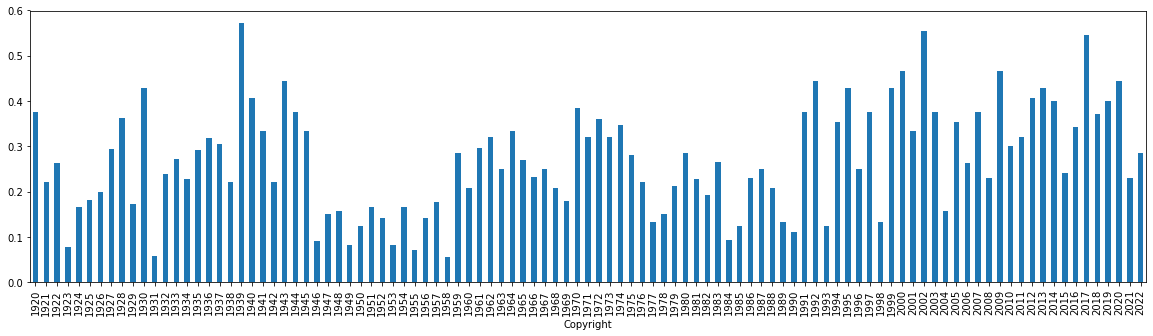

In [11]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [12]:
hcfhraji = hcfhraji.explode("Hrají")

In [13]:
hcfhraji["Gender"] = hcfhraji["Hrají"].apply(lambda x: gender(x, zeny, nelide))

In [14]:
def pomer_herecek(dataframe):
    pomer = pd.Series(dataframe[dataframe["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / dataframe[(dataframe["Gender"] == "muž") | (dataframe["Gender"] == "žena")].groupby("Film")["Hrají"].nunique().sum())
    return pomer

In [15]:
herecky_celkem = pomer_herecek(hcfhraji)
herecky_celkem

0    0.306682
dtype: float64

In [16]:
herecky_7398 = pomer_herecek(hcfhraji[(hcfhraji["Copyright"]) >= 1973 & (hcfhraji["Copyright"] < 1999)])
herecky_7398

0    0.306682
dtype: float64

In [17]:
herecky_99 = pomer_herecek(hcfhraji[hcfhraji["Copyright"] >= 1999])
herecky_99

0    0.364441
dtype: float64

In [18]:
tempo = (herecky_99-herecky_7398) / 25
rok = 2010
podil = herecky_99
while float(podil) < 0.51:
    rok = rok + 1
    podil = podil + tempo
    if float(podil) > 0.49:
        print(f"{int(rok)}: {float(podil)}")

2065: 0.49151261102942745
2066: 0.49382299637734917
2067: 0.4961333817252709
2068: 0.4984437670731926
2069: 0.5007541524211143
2070: 0.503064537769036
2071: 0.5053749231169578
2072: 0.5076853084648795
2073: 0.5099956938128012
2074: 0.5123060791607229


C:\Users\micha\AppData\Local\Temp\ipykernel_24228\3207822581.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  while float(podil) < 0.51:
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\3207822581.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(podil) > 0.49:
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\3207822581.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{int(rok)}: {float(podil)}")


## Herectvo

In [19]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/05/29 14:38:47 z 108843 řádků odstraněno 3001. Aktuální dataframe má 105842 řádků.


In [20]:
herectvo

,Film,Role,Hraje,Mluví
30,Eastern – Krvavý Hugo (10173),Krvavý Hugo,Štefan Capko,NaN
31,Eastern – Krvavý Hugo (10173),stařenka,Hedvika Krupičková,NaN
32,Eastern – Krvavý Hugo (10173),holčička,Lucie Štepánková,NaN
33,Eastern – Krvavý Hugo (10173),pradlenka,Denisa Nová,NaN
34,Eastern – Krvavý Hugo (10173),muž,Jakub Šimůnek (3277),NaN
...,...,...,...,...
108788,Knoflíkáři (9793),postava z dokumentu,Dennis Moran,NaN
108789,Knoflíkáři (9793),dívka vyvolávající duchy,Mariána Stojlovová,NaN
108790,Knoflíkáři (9793),dívka vyvolávající duchy,Bára Brodská,NaN
108791,Knoflíkáři (9793),dívka vyvolávající duchy,Julie Stolpovskich /ž/,NaN


In [21]:
herectvo = herectvo.explode("Role")

In [22]:
herectvo["Hraje"].sample(10)

557              Attila Mokos (6604)
46163                    Jan Výborný
31495                  Karel Jeřábek
71451        Jitka Sedláčková (1435)
25161           Vojta Novák (128319)
17415     Sylvie Havránková (127673)
72396          Jaroslav Tomsa (2576)
108571           Klára Issová (1058)
49571                    Jiří Prýmek
87830                 Bohunka Sladká
Name: Hraje, dtype: object

In [23]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [24]:
herectvo = herectvo.merge(persony, left_on = "Hraje", right_on = "Jméno")

In [25]:
herectvo = herectvo.merge(df[["Film","Copyright"]], on="Film", how = "inner")

In [26]:
herectvo["Věk"] = herectvo["Copyright"] - herectvo["Rok narození"]

In [27]:
herectvo[herectvo["Věk"] < 1]

,Film,Role,Hraje,Mluví,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Copyright,Věk
16388,Hvězda padá vzhůru (397037),ženich,Ivan Horák (2298),NaN,Ivan Horák (2298),2298,zvukař,fyzická,None,None,1977-11-01T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1977.0,NaN,1974,-3.0
16389,Hvězda padá vzhůru (397037),hudebník,Ivan Horák (2298),NaN,Ivan Horák (2298),2298,zvukař,fyzická,None,None,1977-11-01T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1977.0,NaN,1974,-3.0
88608,Babinský (395277),None,Ladislav Pech (131498),NaN,Ladislav Pech (131498),131498,"herec, divadelní režisér",fyzická,None,None,1966-10-21T00:00:00.000,"Praha, Rakouské císařství",1942-07-07T00:00:00.000,"Brno, Československo",Praha,Rakouské císařství,Československo,Československo,1966.0,1942.0,1922,-44.0


In [28]:
herectvo = herectvo[herectvo["Věk"] > 0]

In [29]:
persony.shape

(35457, 16)

In [30]:
herectvo.shape

(77534, 22)

In [31]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=False)][["Hraje","Copyright","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Hraje,Copyright,Role,Věk
70377,Ladislav Pešek (53326),1975,principál komediantů,69.0
80567,Marie Häusslerová (33648),1933,starší komorná princezny,67.0
31059,Martin Růžek (4934),1984,principál Fortunatus,66.0
52443,Theodor Pištěk (37366),1959,princův pobočník,64.0
59986,Ludmila Vostrčilová (27337),1978,sekretářka Šprinclová,60.0
59987,Ludmila Vostrčilová (27337),1978,sekretářka Šprinclová,60.0
81824,Antonín Bulík (130255),1938,princ Lobkovic,60.0
51010,František Kubíček (87096),1971,sluha princátka,57.0
2353,Radovan Lukavský (3301),1976,"král všech moří, otec šesti princezen",57.0
36724,Josef Kemr (4897),1978,"principál, otec Tončky",56.0


In [32]:
zanry = df[["Film","Žánr"]]

In [33]:
zanry

,Film,Žánr
0,Alarm staroměstských hasičů (401719),reportáž
1,Smích a pláč (395110),anekdota
2,Dostaveníčko ve mlýnici (395109),fraška
3,Žofínská plovárna (401718),reportáž
4,Voltýžování jízdního odboru Sokola pražského (...,"[reportáž, sportovní]"
...,...,...
4550,Zuza v zahradách (402223),dětský
4551,Mimi & Líza (402224),"[pohádka, povídkový]"
4552,Jan Žižka (402240),"[drama, historický, akční]"
4553,Idiot (402230),"[drama, záznam divadelní inscenace]"


In [34]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              960
drama                636
psychologický        394
příběh               229
povídka              227
pohádka              218
reklamní             217
dětský               190
historický           162
melodrama            154
dokument             129
kriminální           118
etuda                110
hudební              107
životopisný          106
satira                93
dobrodružný           86
hořká komedie         78
groteska              77
povídkový             77
osvětový              71
reportáž              71
rodinný               68
politický             67
detektivní            66
sociální              65
tragikomedie          58
umělecký              58
válečný               49
fantastický           45
medailon              45
smutná komedie        43
poetický              41
thriller              41
časosběrný            41
podobenství           40
sportovní             40
esej                  39
propagační            39
road movie          

In [35]:
pohadky = ["pohádka","dětský","rodinný"]

In [36]:
herectvo = herectvo.merge(zanry, on="Film")

In [37]:
herectvo = herectvo.explode("Žánr")

In [38]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jakou barvu má láska (396997)        důchodce Mácha                                     53.0
Jan Kašpar (10009)           Vra

In [39]:
princove = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max())
princove.sort_values(by="Věk",ascending=False)

,,,Věk
Jméno,Film,Role,
Jiří Maryško (81150),Tajemství staré bambitky 2 (402174),"princ Oleandr, nápadník",41.0
Vladimír Zoubek (125641),O medvědu Ondřejovi (396371),princ Vítek,39.0
Petr Hanuš (3548),Třetí princ (397364),princ na koni,39.0
Miroslav Kalný (131466),O medvědu Ondřejovi (396371),princ nápadník,37.0
Soběslav Sejk (9018),O medvědu Ondřejovi (396371),princ Hynek,37.0
Miroslav Horníček (13266),Byl jednou jeden král... (396193),"princ krásný, syn Alabastra XVI.",36.0
Václav Neužil (9101),Sedmero krkavců (400594),princ Norbert,36.0
Jiří Bartoška (827),Třetí princ (397364),princ Jindřich,35.0
Ondřej Vetchý (836),Kouzelný měšec (8531),princ Velemír,34.0


In [40]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

30.0

In [41]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

29.125

In [42]:
princezny = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20))
princezny

Věk
Jméno                     Film                                  Role                                      
Stella Májová (67287)     Byl jednou jeden král... (396193)     princezna Zpěvanka                    31.0
Jorga Kotrbová (125595)   Honza málem králem (397135)           princezna                             30.0
Květa Fialová (5338)      Princezna se zlatou hvězdou (396365)  princezna Florindella                 30.0
Irena Kačírková (81377)   Byl jednou jeden král... (396193)     princezna Drahomíra                   29.0
Libuše Šafránková (2272)  Třetí princ (397364)                  princezna Milena                      29.0
                                                                princezna ze skal                     29.0
Sabina Laurinová (3857)   Z pekla štěstí 2 (1201)               princezna Eufrozína                   29.0
Vlasta Fialová (5062)     Legenda o lásce (396257)              princezna Mechmene Banu               28.0
Sabina Laurinová (3857)   Z pekla štěstí (53139)                princezna Eufrozína                   27.0
Věra Benšová (127407)     Strakonický dudák (396214)            princezna Zulika, Aleonorosova dcera  26.0
Jitka Schneiderová (3264) Jezerní královna (150214)             princezna Odetta                      25.0
Alena Vránová (4984)      Hrátky s čertem (396261)              princezna Dišperanda                  24.0
Marie Kyselková (53291)   Princezna se zlatou hvězdou (396365)  princezna Lada, Hostivítova dcera     24.0
Aglaia Morávková (128888) O medvědu Ondřejovi (396371)          princezna Blanka                      23.0
Jana Kasanová (27344)     Tři zlaté vlasy děda Vševěda (396526) princezna                             23.0
Julie Jurištová (87459)   Deváté srdce (397210)                 princezna Adriena                     23.0
                          Princ a Večernice (397192)            princezna Helenka                     23.0
Libuše Šafránková (2272)  Malá mořská víla (397113)             princezna ze sousední říše            23.0
Magda Vášáryová (31019)   Princ Bajaja (396912)                 princezna Slavěna                     23.0
Taťána Čechovská (27546)  O statečném kováři (397412)           plavovlasá princezna                  23.0

In [43]:
len(princove[princove["Věk"] > princezny["Věk"].max()])

13

In [135]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.0

In [136]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.536585365853657

In [46]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [47]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [48]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6502
0


In [49]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Copyright","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [50]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
64647,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
64648,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
64649,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Ladislav Mrnka (126577),47.0,muž,NaN
64656,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [51]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
64664,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
64665,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
64666,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
64667,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [52]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Copyright"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [53]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
64664,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
64665,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
64666,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
64667,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [54]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
54819,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
54820,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
54821,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
54822,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
54823,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
54824,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
54825,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
54826,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
54827,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
54828,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [55]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)           86.500000
Panenství Lídy Baarové (400756)      83.000000
Ďábel (396930)                       82.000000
Kouzelná skříň (397535)              73.000000
Pátá loď (401180)                    72.000000
Pamětnice (123955)                   71.967742
Eva Nová (400704)                    70.333333
Prolog (7919)                        70.000000
Kuchyňské pohádky (400854)           69.000000
Tajemství pouze služební (400765)    66.368421
Name: Věk, dtype: float64

In [56]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                             5.00
Příušnice (400098)                                    6.00
Malý sen (396231)                                    13.00
Cesta do pravěku (396218)                            14.25
Československý Ježíšek (395161)                      15.00
Černý démant (398743)                                15.25
Jak Vašíček přišel k nohám (395247)                  17.00
Kino (396465)                                        17.00
Čo ja o tom viem alebo Záznam o sklamaní (396760)    17.00
Žalman aneb Naslouchám tichu Země (401765)           17.00
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

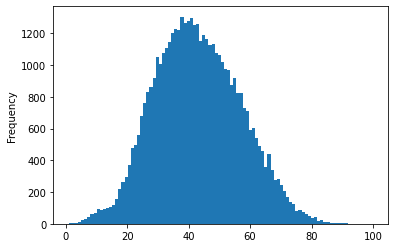

In [57]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

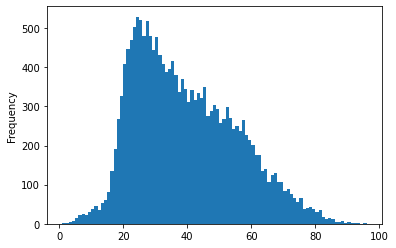

In [58]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [59]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

42.0

In [60]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [61]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    38.0
Name: Věk, dtype: float64

In [62]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [63]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

45.0

In [64]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

41.0

<AxesSubplot:ylabel='Frequency'>

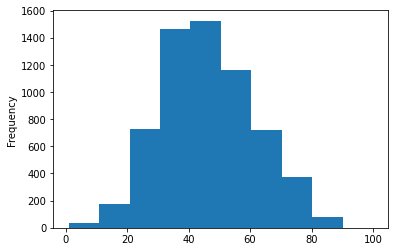

In [65]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

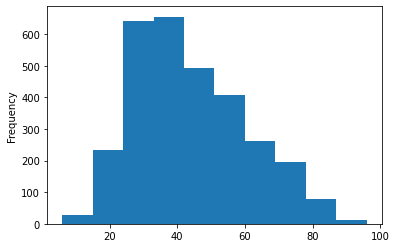

In [66]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist()

## Režisérstvo

In [67]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [68]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [69]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x, zeny, nelide))

In [70]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3478,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3478,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3479,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,distribuční,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,studentský,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
...,...,...,...,...,...,...,...
4549,2022,distribuční,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena
4550,2022,animovaný,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4550,2022,distribuční,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4552,2022,hraný,dlouhometrážní,"[drama, historický, akční]",Jan Žižka (402240),Alice Hurychová (81624),žena


In [71]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.10112866817155756

In [72]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.05613425925925926

In [73]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.2378167641325536

In [74]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.15257352941176472

<AxesSubplot:xlabel='Copyright'>

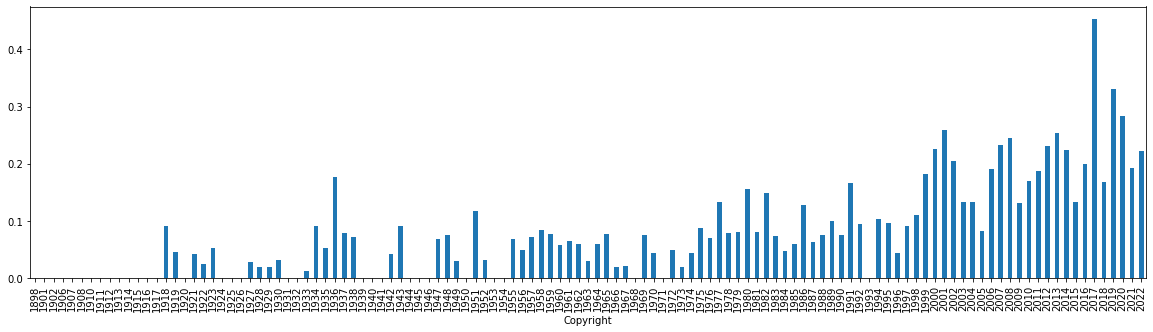

In [75]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

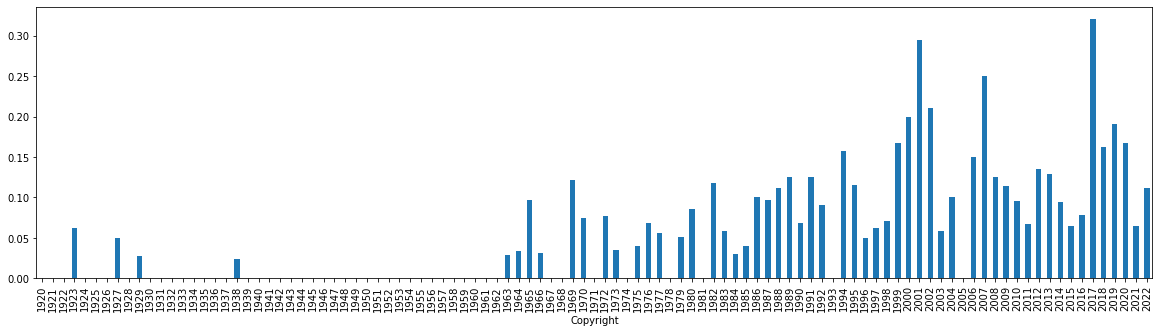

In [76]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [77]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
Ada Pellová-Czivišová (55927),1929,Cikánská láska (395810),distribuční
...,...,...,...
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Vera Lacková (105595),2021,Jak jsem se stala partyzánkou (402160),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [78]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [79]:
for t in typy:
    try:
        mu = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        ze = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {ze/(ze+mu)}, m: {mu}, ž: {ze}""")
    except:
        print(f"""{t}: m: {mu}, ž: {ze}""")

dokumentární: 0.31733333333333336, m: 256, ž: 119
distribuční: 0.23076923076923078, m: 910, ž: 273
hraný: 0.15114503816793892, m: 556, ž: 99
animovaný: 0.36024844720496896, m: 103, ž: 58
studentský: 0.46923076923076923, m: 69, ž: 61
nedistribuční: m: 4, ž: 61
středometrážní: m: 4, ž: 61
krátkometrážní: 0.3, m: 7, ž: 3


<AxesSubplot:xlabel='Copyright'>

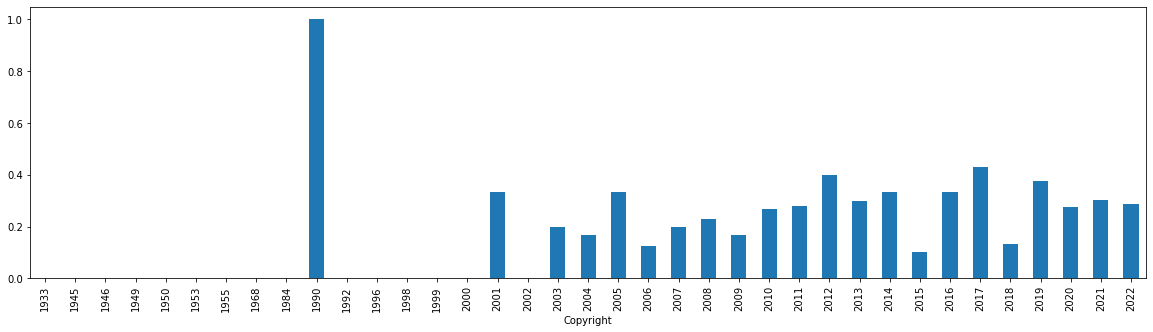

In [80]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

## Různé profese

In [81]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [82]:
fyzicke = persony[persony["Osoba"] != "právní"]

In [83]:
def profesni_pomery(frame, persony, prvni=True):
    global nelide
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno", how="outer")
        df_pracovni = df_pracovni[~df_pracovni["Jméno"].isin(nelide)]
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        stats = []
        stats.append(df_pracovni.groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())
        if prvni:
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min())
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min())
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
    return pomery.sort_values(by="Podíl žen",ascending=False)

In [84]:
profesni_pomery(df, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1179.0,54.0,1125.0,0.954198,1944.0,1938.0
Asistent střihu,1532.0,185.0,1347.0,0.879243,1945.0,1945.0
Kostýmy,3788.0,657.0,3131.0,0.826558,1931.0,1931.0
Zástupce vedoucího produkce,403.0,107.0,296.0,0.734491,1991.0,1991.0
Návrhy kostýmů,2027.0,745.0,1282.0,0.632462,1922.0,1932.0
Asistent vedoucího produkce,726.0,335.0,391.0,0.538567,1992.0,1952.0
Produkce,1366.0,685.0,681.0,0.498536,1935.0,1954.0
Masky,5230.0,2806.0,2423.0,0.463377,1926.0,1945.0
Vedoucí produkce,1176.0,669.0,507.0,0.431122,1991.0,1993.0
České podtitulky,184.0,113.0,70.0,0.382514,1996.0,1936.0


In [85]:
profesni_pomery(hcf, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1059.0,41.0,1018.0,0.961284,1944.0,1938.0
Asistent střihu,1317.0,116.0,1201.0,0.911921,1965.0,1945.0
Kostýmy,3544.0,620.0,2924.0,0.825056,1931.0,1931.0
Zástupce vedoucího produkce,311.0,90.0,221.0,0.710611,1991.0,1991.0
Návrhy kostýmů,1859.0,695.0,1164.0,0.626143,1922.0,1932.0
Asistent vedoucího produkce,443.0,220.0,223.0,0.503386,1992.0,1991.0
Produkce,621.0,327.0,294.0,0.473430,1981.0,1992.0
Masky,4843.0,2597.0,2245.0,0.463651,1926.0,1945.0
Vedoucí produkce,743.0,431.0,312.0,0.419919,1991.0,1993.0
Účinkují,43.0,25.0,18.0,0.418605,1998.0,2003.0


In [137]:
profesni_pomery(df[df["Copyright"] >= 1998], fyzicke, prvni=False)

,Celkem,Mužů,Žen,Podíl žen
Skript,265.0,40.0,225.0,0.849057
Kostýmy,896.0,139.0,757.0,0.844866
Návrhy kostýmů,708.0,159.0,549.0,0.775424
Zástupce vedoucího produkce,352.0,81.0,271.0,0.769886
Asistent vedoucího výroby,4.0,1.0,3.0,0.750000
Masky,1476.0,407.0,1068.0,0.724068
Assistent architekta,109.0,47.0,62.0,0.568807
Zástupce vedoucího výroby,183.0,79.0,104.0,0.568306
Asistent vedoucího produkce,691.0,321.0,370.0,0.535456
Dialogy české verze,25.0,12.0,13.0,0.520000


In [87]:
profesni_pomery(hcf[hcf["Copyright"] >= 1998], fyzicke, prvni=False)

C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2156053058.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())


,Celkem,Mužů,Žen,Podíl žen
Skript,239.0,29.0,210.0,0.878661
Kostýmy,850.0,130.0,720.0,0.847059
Návrhy kostýmů,631.0,142.0,489.0,0.774960
Zástupce vedoucího produkce,260.0,64.0,196.0,0.753846
Masky,1403.0,389.0,1013.0,0.722539
Zástupce vedoucího výroby,149.0,65.0,84.0,0.563758
Assistent architekta,103.0,46.0,57.0,0.553398
Dialogy české verze,19.0,9.0,10.0,0.526316
Režie české verze,29.0,14.0,15.0,0.517241
Asistent vedoucího produkce,409.0,206.0,203.0,0.496333


## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [88]:
def vek(dataframe, persony, filtr):
    global p
    vek = {}
    for p in seznamy["profese"]:
        df_pracovni = dataframe.explode("Typologie")
        df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
        df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 1998][["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
        df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
        df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
        df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
        vek[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max(), df_pracovni[p].nunique()]
    vek = pd.DataFrame.from_dict(vek).transpose().rename(columns={0: "Medián", 1: "Průměr", 2: "Nejnižší", 3: "Nejvyšší", 4: "n"})
    return vek[vek["n"] > filtr].sort_values(by="Medián",ascending=False)

In [89]:
vek(df, fyzicke, 20)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Skript,66.0,57.166667,24.0,71.0,27.0
Dramaturg,57.0,55.992674,22.0,88.0,237.0
Odborný poradce,55.0,55.875000,27.0,91.0,237.0
Koordinátor kaskadérů,55.0,53.661836,27.0,72.0,41.0
Masky,54.0,52.612245,21.0,76.0,193.0
Pedagogické vedení,53.0,56.493827,33.0,82.0,40.0
Komentář,53.0,51.698413,22.0,81.0,59.0
Výkonná produkce,50.0,47.944444,22.0,82.0,225.0
Triky,49.5,48.312500,21.0,67.0,56.0
Zástupce vedoucího produkce,49.0,47.840000,26.0,64.0,35.0


In [90]:
vek(df[df["Copyright"] > 1998], fyzicke, 150)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Odborný poradce,58.0,57.591549,28.0,91.0,219.0
Dramaturg,57.0,56.209434,22.0,88.0,228.0
Masky,55.0,52.825996,21.0,76.0,189.0
Výkonná produkce,50.0,47.944444,22.0,82.0,225.0
Kaskadéři,48.0,48.426630,24.0,73.0,277.0
Návrhy kostýmů,47.5,47.771930,22.0,81.0,182.0
Architekt,47.0,47.669323,25.0,79.0,165.0
Mluví,46.0,45.696429,9.0,89.0,490.0
Kamera,45.0,46.517367,19.0,77.0,224.0
Střih,45.0,46.037344,21.0,81.0,198.0


In [91]:
rezie = df[["Film","Copyright","Režie","Typologie","Délka"]].explode("Režie").explode("Typologie")
rezie = rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")]

In [92]:
rezie = rezie.merge(persony[["Jméno","Rok narození"]], left_on = "Režie", right_on = "Jméno")

In [93]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [94]:
rezie = rezie.drop_duplicates()

<AxesSubplot:xlabel='Copyright'>

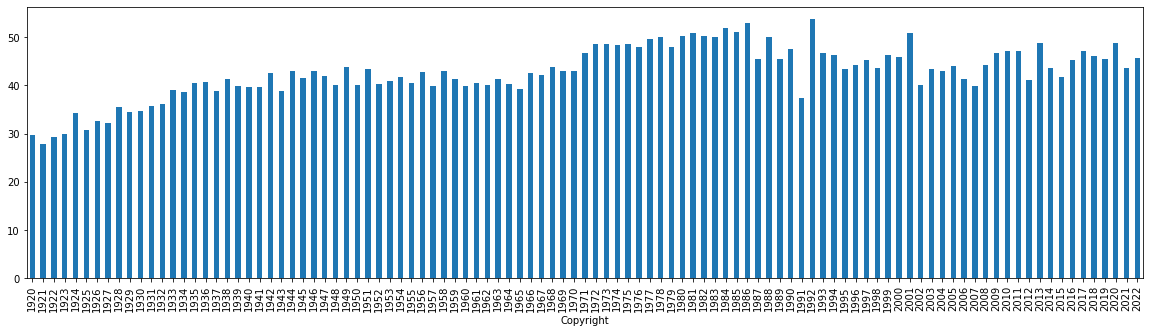

In [95]:
rezie.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

In [96]:
nejmladsi_reziseri = rezie.groupby("Copyright")["Věk"].min()

In [97]:
nejmladsi_reziseri[nejmladsi_reziseri >= 30]

Copyright
1934    32.0
1935    32.0
1942    31.0
1943    30.0
1945    32.0
1953    31.0
1955    31.0
1957    30.0
1960    30.0
1962    32.0
1968    30.0
1969    30.0
1971    32.0
1972    35.0
1973    34.0
1974    35.0
1975    30.0
1976    31.0
1977    32.0
1978    34.0
1980    30.0
1982    30.0
1983    30.0
1984    31.0
1985    31.0
1986    32.0
1987    30.0
1988    31.0
1990    31.0
2000    31.0
2001    32.0
2003    32.0
2020    30.0
2022    32.0
Name: Věk, dtype: float64

In [98]:
rezie[(rezie["Věk"] < 30) & (rezie["Copyright"].isin(range(1960,1991)))]

,Film,Copyright,Režie,Typologie,Délka,Jméno,Rok narození,Věk
1507,Uprchlík (396433),1961,Herrmann Zschoche (129164),hraný,dlouhometrážní,Herrmann Zschoche (129164),1934.0,27.0
1583,Křik (396542),1963,Jaromil Jireš (5317),hraný,dlouhometrážní,Jaromil Jireš (5317),1935.0,28.0
1601,Máte doma lva? (396539),1963,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,28.0
1602,Za pět minut sedm (396581),1964,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,29.0
1642,Démanty noci (396605),1964,Jan Němec (3041),hraný,dlouhometrážní,Jan Němec (3041),1936.0,28.0
1671,Místenka bez návratu (396596),1964,Dušan Klein (2568),hraný,dlouhometrážní,Dušan Klein (2568),1939.0,25.0
1695,Místenka bez návratu (396596),1964,Miroslav Sobota (54046),hraný,dlouhometrážní,Miroslav Sobota (54046),1935.0,29.0
1769,Nikdo se nebude smát (396650),1965,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,27.0
1770,Soukromá vichřice (396727),1967,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,29.0
1787,Ostře sledované vlaky (396694),1966,Jiří Menzel (7887),hraný,dlouhometrážní,Jiří Menzel (7887),1938.0,28.0


## Mluveno

In [99]:
mluveno = df.explode("Mluveno")

In [100]:
mluveno["Mluveno"].drop_duplicates().to_list()

['bez dialogů',
 'česky',
 'německy',
 'francouzsky',
 'anglicky',
 'komentář',
 'slovensky',
 'polsky',
 'rusínsky',
 'jidiš',
 'zpíváno',
 'maďarsky',
 'latinsky',
 'srbochorvatsky',
 'inuitsky',
 'rusky',
 'italsky',
 'hebrejsky',
 'čínsky',
 'tibetsky',
 'vietnamsky',
 'korejsky',
 'španělsky',
 'nizozemsky',
 'indonésky',
 'romsky',
 'portugalsky',
 'japonsky',
 'mongolsky',
 'bulharsky',
 'khmersky',
 'švédsky',
 'turecky',
 'ukrajinsky',
 None,
 'lotyšsky',
 'makedonsky',
 'řecky',
 'staroslověnsky',
 'fiktivním jazykem bandungštinou',
 'znakovou řečí',
 'finsky',
 'islandsky',
 'ázerbájdžánsky',
 'fiktivním jazyjkem',
 'šarišsky',
 'dánsky',
 'arménsky',
 'slovinsky',
 'albánsky',
 'chorvatsky',
 'srbsky',
 'rumunsky',
 'bosensky',
 'arabsky',
 'moldavsky',
 'nepálsky',
 'somálsky',
 'oromsky',
 'fiktivním jazykem aporverštinou',
 'navažsky',
 'bengálsky',
 'slezsky',
 'rwandsky',
 'svahilsky',
 'gruzínsky',
 'sámsky',
 'umělým jazykem mezislovanštinou',
 'hindsky',
 'persky',


<AxesSubplot:xlabel='Copyright'>

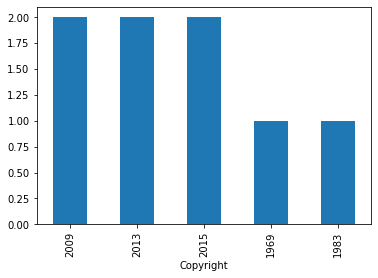

In [101]:
mluveno[mluveno["Mluveno"] == "romsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

In [102]:
mluveno[mluveno["Mluveno"] == "romsky"][["Film","Copyright"]].sort_values(by="Copyright")

,Film,Copyright
2161,Skřivánci na niti (396810),1969
2828,Radikální řez (397408),1983
3329,Černobílá v barvě (53571),1999
3362,Zpráva o putování studentů Petra a Jakuba (16884),2000
3581,Iné svety (45546),2006
3692,Ulovit miliardáře (118291),2009
3704,El Paso (65979),2009
3811,Cigán (166202),2011
3871,Až do města Aš (190372),2012
3921,Vojta Lavička: Nahoru a dolů (103360),2013


<AxesSubplot:xlabel='Copyright'>

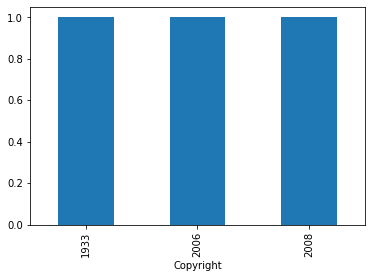

In [103]:
mluveno[mluveno["Mluveno"] == "rusínsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

<AxesSubplot:xlabel='Copyright'>

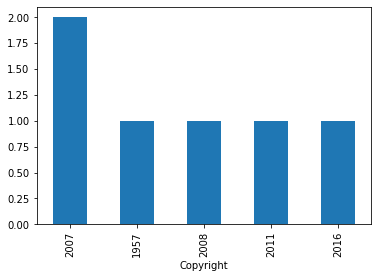

In [104]:
mluveno[mluveno["Mluveno"] == "vietnamsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

## Rodiště

In [105]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [106]:
persony[persony["Osoba"] == "fyzická"].shape

(31149, 16)

In [107]:
persony[~persony["Město narození"].isnull()].shape

(9506, 16)

In [108]:
persony[(persony["Osoba"] == "fyzická") & (~persony["Město narození"].isnull())].shape

(9506, 16)

In [109]:
persony[persony["Město narození"] == "Praha"].shape

(3503, 16)

### Kontrola

In [110]:
persony[persony["Město narození"] == "Praha"].sample(10)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
11178,Jaroslav Kaňkovský (17433),17433,"herec, dabér",fyzická,None,None,1944-07-03T00:00:00.000,"Praha, Československo",2014-06-03T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1944.0,2014.0
10519,Ondřej Ježek (1554),1554,zvukař,fyzická,"Ondřej Ježek – Jámor Studio, Ondřej Ježek – S...",None,1973-01-02T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1973.0,NaN
13695,DJ Wich (23302),23302,"producent, diskžokej",fyzická,"Tomáš Pechlák (rodné jméno), Máňa (pseudonym)...",None,1978-06-09T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1978.0,NaN
792,Antonín Beck (105031),105031,"novinář, filmový novinář a publicista, neherec",fyzická,None,None,1902-06-21T00:00:00.000,"Praha, Rakousko-Uhersko",None,None,Praha,Rakousko-Uhersko,None,None,1902.0,NaN
26432,Josef Koníček (75651),75651,"choreograf, tanečník",fyzická,None,"JOSEF KONÍČEK (nar. 3.10.1931, Praha – zemřel ...",1931-10-03T00:00:00.000,"Praha, Československo",2010-04-03T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1931.0,2010.0
14585,Rafael Pražák (2590),2590,herec,fyzická,None,None,1963-12-09T00:00:00.000,"Praha, Československo",2021-12-11T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1963.0,2021.0
22142,Jan Matějovský (54066),54066,"scenárista, pedagog, režisér",fyzická,None,None,1923-08-21T00:00:00.000,"Praha, Československo",1983-03-18T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1923.0,1983.0
7447,Ema Řezáčová (128647),128647,"dramatička, spisovatelka",fyzická,Ema Voňavková (provdaná),None,1903-11-17T00:00:00.000,"Praha, Rakousko-Uhersko",1997-06-29T00:00:00.000,"Praha, Čëská republika",Praha,Rakousko-Uhersko,Čëská republika,Čëská republika,1903.0,1997.0
18889,Jana Altmannová (3572),3572,"herečka, spíkr, pedagožka, loutkoherečka, dabérka",fyzická,Jana Altmanová (chybný tvar),None,1944-10-17T00:00:00.000,"Praha, Československo",2021-10-30T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1944.0,2021.0
14384,Václav Klaus (251),251,"politik, prezident, ekonom",fyzická,None,None,1941-06-19T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1941.0,NaN


In [111]:
with open(os.path.join("data_fixes", "1000nejcastejsich.json"), encoding="utf-8") as nejcastejsi:
    nejcastejsi = json.loads(nejcastejsi.read())

In [112]:
persony[(persony["Jméno"].isin(nejcastejsi)) & (persony["Město narození"] == "Praha")][["Jméno","Medailon","Rok narození","Místo narození"]].sample(20)

,Jméno,Medailon,Rok narození,Místo narození
649,Oldřich Kovář (104486),"herec, zpěvák, operní zpěvák",1907.0,"Praha, Rakousko-Uhersko"
31350,Slávka Doležalová-Kulhavá (84685),"herečka, kostymérka",1913.0,"Praha, Rakousko-Uhersko"
21768,Jan S. Kolár (51548),"scenárista, herec, filmový historik, filmový n...",1896.0,"Praha, Rakousko-Uhersko"
835,Jana Švandová (1051),herečka,1947.0,"Praha, Československo"
6058,Rudolf Stahl st. (127315),"herec, asistent režie, vedoucí výroby/produkce",1903.0,"Praha, Rakousko-Uhersko"
12825,Alena Šedová (21784),"maskérka, vlásenkářka, kadeřnice",1946.0,"Praha, Československo"
11184,Jaroslav Brabec (1744),"kameraman, pedagog, režisér",1954.0,"Praha, Československo"
28471,Zdeněk Srstka (7960),"herec, kaskadér, moderátor, sportovec",1935.0,"Praha, Československo"
1137,Jan Kraus (1062),"herec, dramatik, moderátor, režisér",1953.0,"Praha, Československo"
6450,Jiří Hron (127679),herec,1904.0,"Praha, Rakousko-Uhersko"


### Analýza

In [113]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [114]:
def rodiste(frame, persony, nelide, podil=float, n=int):
    pomery = {}
    for p in seznamy["profese"]:
        persony_pracovni = persony[persony["Osoba"] == "fyzická"]
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony_pracovni[["Jméno","Osoba","Město narození","Stát narození"]], left_on = p, right_on = "Jméno")
        stats = []
        celkem = frame.explode(p)
        celkem = celkem[~(celkem[p].isnull())]
        celkem = celkem[~(celkem[p].isin(nelide))]
        celkem = len(celkem[p].to_list())
        # člověkofilmy celkem, vč. lidí bez id
        stats.append(celkem)
        df_pracovni = df_pracovni[(df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())]
        celkem_cr = df_pracovni.groupby("Film")[p].nunique().sum() 
        stats.append(celkem_cr) # člověkofilmy: narození v čr
        stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Plzeň"].groupby("Film")[p].nunique().sum() / celkem)
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "S údajem o narození v ČR", 2: "%", 3: "Praha", 4: "Brno", 5: "Ostrava", 6: "Plzeň"})
    return pomery[(pomery["%"] >= podil) & (pomery["S údajem o narození v ČR"] >= n)].sort_values(by="Praha",ascending=False)

In [115]:
rodiste(df, persony, nelide, podil=0.5, n=100)

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Architekt,3018.0,2233.0,0.739894,0.369119,0.037773,0.006296,0.026508
Choreografie,279.0,178.0,0.637993,0.362007,0.028674,0.010753,0.000000
Režie,4749.0,3855.0,0.811750,0.358181,0.025479,0.012845,0.021478
Komentář,664.0,549.0,0.826807,0.352410,0.039157,0.006024,0.019578
Technický scénář,1455.0,1242.0,0.853608,0.340893,0.035739,0.015808,0.026804
Původní filmový námět,3502.0,2653.0,0.757567,0.320388,0.026842,0.013706,0.020274
Scénář,6953.0,5175.0,0.744283,0.315547,0.027758,0.009348,0.017403
Kamera,5549.0,3602.0,0.649126,0.308704,0.018382,0.001081,0.004866
Mluví,3507.0,2393.0,0.682350,0.303964,0.021671,0.012831,0.016253
Autor komentáře,233.0,181.0,0.776824,0.270386,0.042918,0.030043,0.008584


In [116]:
rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:21

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Režie,659.0,542.0,0.822458,0.320182,0.018209,0.010622,0.021244
Kamera,800.0,394.0,0.492500,0.262500,0.011250,0.000000,0.006250
Původní filmový námět,470.0,319.0,0.678723,0.257447,0.023404,0.010638,0.017021
Scénář,1289.0,718.0,0.557021,0.214895,0.016292,0.003103,0.013189
Dramaturg,1186.0,380.0,0.320405,0.202361,0.005902,0.005059,0.000000
Producent,1460.0,564.0,0.386301,0.195205,0.009589,0.002740,0.002740
Výkonná produkce,925.0,207.0,0.223784,0.170811,0.002162,0.000000,0.000000
Mluví,761.0,283.0,0.371879,0.162943,0.018397,0.011827,0.003942
Střih,725.0,259.0,0.357241,0.153103,0.008276,0.000000,0.001379
"Hudba, text a zpěv písně",4941.0,1404.0,0.284153,0.131755,0.007488,0.007488,0.009512


In [117]:
napokusy = rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_24228\2918446222.py:21

In [118]:
napokusy["Praha / Brno"] = napokusy["Praha"] / napokusy["Brno"]
napokusy.sort_values(by="Praha / Brno")

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň,Praha / Brno
Spolupráce,3823.0,257.0,0.067225,0.038713,0.005493,0.000000,0.000523,7.047619
Mluví,761.0,283.0,0.371879,0.162943,0.018397,0.011827,0.003942,8.857143
Hrají,25285.0,7418.0,0.293376,0.116077,0.011865,0.010045,0.006130,9.783333
Původní filmový námět,470.0,319.0,0.678723,0.257447,0.023404,0.010638,0.017021,11.000000
Scénář,1289.0,718.0,0.557021,0.214895,0.016292,0.003103,0.013189,13.190476
Režie,659.0,542.0,0.822458,0.320182,0.018209,0.010622,0.021244,17.583333
"Hudba, text a zpěv písně",4941.0,1404.0,0.284153,0.131755,0.007488,0.007488,0.009512,17.594595
Střih,725.0,259.0,0.357241,0.153103,0.008276,0.000000,0.001379,18.500000
Producent,1460.0,564.0,0.386301,0.195205,0.009589,0.002740,0.002740,20.357143
Kamera,800.0,394.0,0.492500,0.262500,0.011250,0.000000,0.006250,23.333333


In [119]:
reziehcf = df[["Režie","Copyright","Film","Typologie","Délka"]].explode("Režie").explode("Typologie")
reziehcf = reziehcf[(reziehcf["Délka"] == "dlouhometrážní") & (reziehcf["Typologie"] == "hraný")]

In [120]:
reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

,Režie,Copyright,Film,Typologie,Délka,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Vladimír Majer (56169),1920,Magdalena (395221),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
1,Vladimír Majer (56169),1921,Manželé paní Mileny (395251),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
2,Vladimír Majer (56169),1934,Rozpustilá noc (395643),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
3,Vladimír Majer (56169),1934,V cizím revíru (395638),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
4,Sidney M. Goldin (127619),1920,Tam na horách (395228),hraný,dlouhometrážní,Sidney M. Goldin (127619),127619,"scenárista, herec, producent, režisér",fyzická,Samuel Goldstein (rodné jméno),None,1878-03-25T00:00:00.000,"Oděsa, Ruská říše",1937-09-19T00:00:00.000,"New York City, New York, USA",Oděsa,Ruská říše,New York,New York,1878.0,1937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,Jan Foukal (19192),2021,Marťanské lodě (402153),hraný,dlouhometrážní,Jan Foukal (19192),19192,"scenárista, režisér",fyzická,"Jan Foukal (rodné jméno), Jan Fukino Foukal","JAN FOUKAL (nar. 11.8.1979, Praha) chodil do z...",1979-08-11T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1979.0,NaN
2999,Jiří Diviš (9927),2021,Město (402235),hraný,dlouhometrážní,Jiří Diviš (9927),9927,"scenárista, producent, režisér",fyzická,JDI Pictures,None,1975-04-25T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1975.0,NaN
3000,Jiří Diviš (9927),2021,Město (402235),hraný,dlouhometrážní,Jiří Diviš (9927),9927,"scenárista, producent, režisér",fyzická,JDI Pictures,None,1975-04-25T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1975.0,NaN
3001,Daniela Špinar (1700),2022,Idiot (402230),hraný,dlouhometrážní,Daniela Špinar (1700),1700,"scenáristka, herečka, organizační pracovnice, ...",fyzická,Daniel Špinar (rodné jméno),None,1979-07-07T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1979.0,NaN


In [121]:
reziehcf = reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

<AxesSubplot:xlabel='Copyright'>

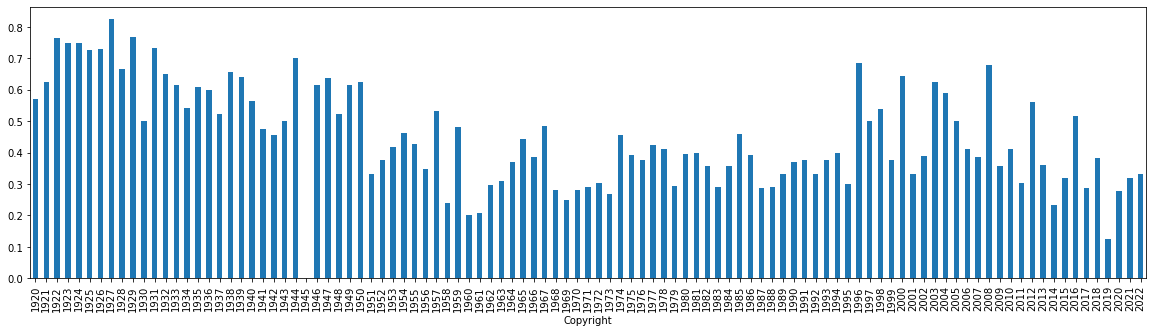

In [122]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Praha"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

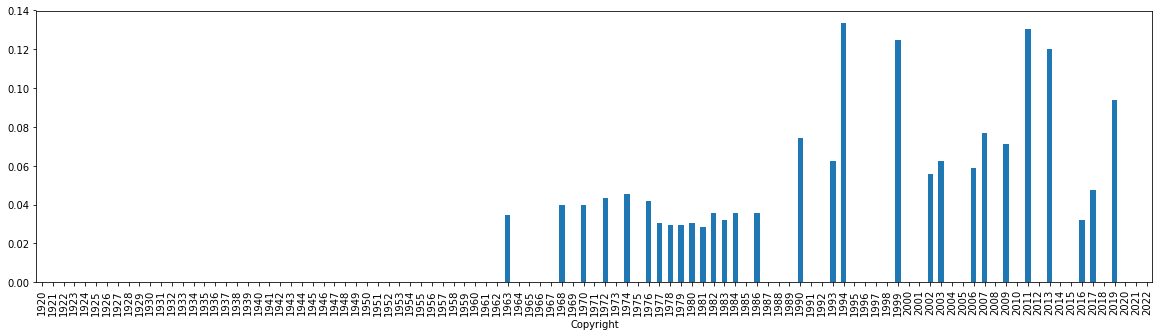

In [123]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Bratislava"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Slováctvo

In [124]:
profese = seznamy["profese"]

In [125]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [126]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [127]:
slovaci = df.explode("Lidé")

In [128]:
slovaci = slovaci.merge(persony, left_on="Lidé", right_on="Jméno")

<AxesSubplot:xlabel='Copyright'>

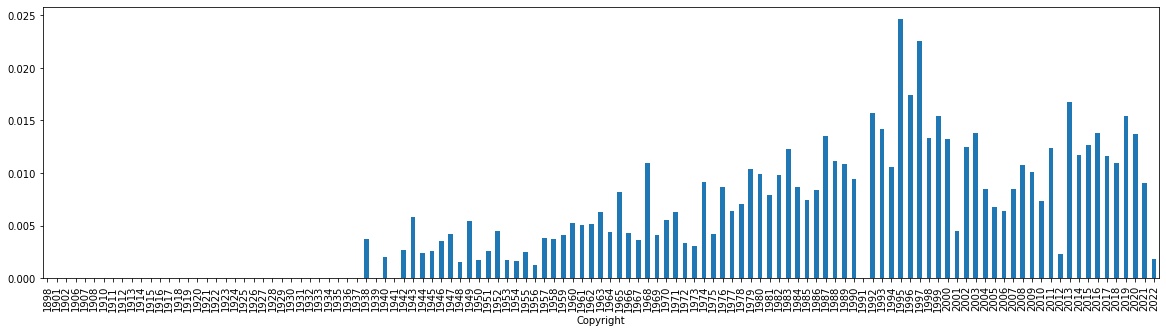

In [129]:
pd.Series(slovaci[slovaci["Město narození"] == "Bratislava"].groupby("Copyright")["Lidé"].nunique() / slovaci.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

In [130]:
slovaci = slovaci.merge

## Kolik filmů spískal Státní fond kinematografie?

In [131]:
podpora = hcf.explode("S podporou")

In [132]:
podpora[podpora["Copyright"] >= 1998].groupby("S podporou")["Film"].nunique().nlargest(15)

S podporou
Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)    193
Státní fond kinematografie (124966)                                              192
Audiovizuálny fond (123056)                                                       84
Ministerstvo kultúry Slovenskej republiky (113236)                                56
Media Programme EU (123258)                                                       50
Program podpory filmového průmyslu (123266)                                       42
Eurimages (107036)                                                                38
Filmová nadace (103156)                                                           14
Polski Instytut Sztuki Filmowej (114937)                                          12
Magistrát hlavního města Prahy (99476)                                            10
Ministerstvo kultury České republiky (92178)                                      10
Jihomoravský filmový nadační fond (110676)            

<AxesSubplot:xlabel='Copyright'>

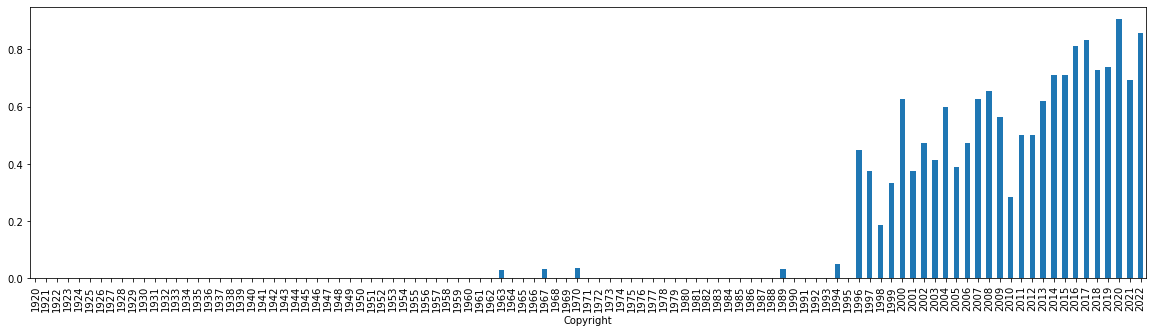

In [133]:
pd.Series(podpora[podpora["S podporou"].isin(["Státní fond kinematografie (124966)","Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)"])].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

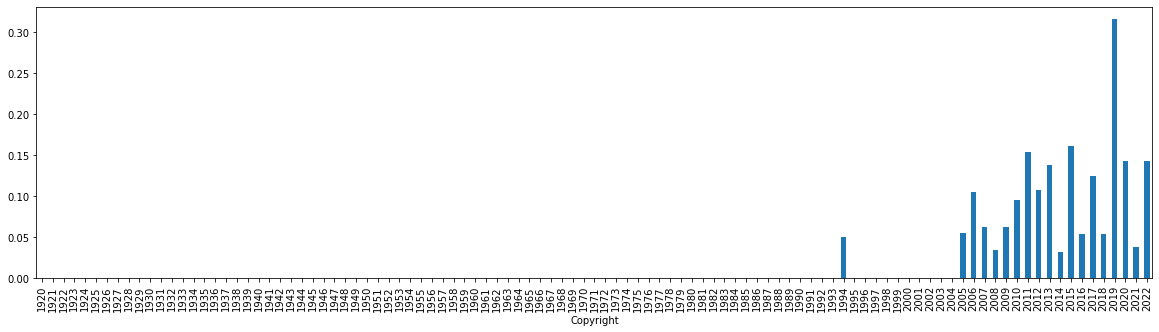

In [134]:
pd.Series(podpora[podpora["S podporou"] == "Media Programme EU (123258)"].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))